In [1]:
!pip install matplotlib networkx

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
df = pd.read_csv('saas.csv')
df.head()

,Date,CustomerID,CustomerStatus,SubscriptionStartDate,SubscriptionEndDate,SubscriptionType,MonthlySubscriptionFee,TotalPayment,MarketingChannel,MarketingSpend,Opportunities,OpportunitiesClosed,ProductCost,Renewals,UpsellRevenue,CrossSellRevenue,ChurnedDate,Expenses
0,2024-01-01,101,Active,2023-07-01,2024-06-30,Standard,500,6000,Email,1200,5,3,1500,0,100,200,NaN,1000
1,2024-01-02,102,Churned,2023-01-01,2023-12-31,Premium,700,8400,Social Media,1500,4,2,1800,0,150,300,2023-12-31,1300
2,2024-01-03,103,Active,2023-05-15,2024-05-14,Standard,600,7200,Paid Search,1100,6,4,1600,0,120,220,NaN,1200
3,2024-01-04,104,Active,2023-08-01,2024-07-31,Premium,800,9600,Referral,1800,7,5,2000,1,200,250,NaN,1500
4,2024-01-05,105,Active,2023-10-10,2024-10-09,Basic,400,4800,Organic Search,900,3,2,1300,0,80,150,NaN,900


### Data Dictionary

+ CustomerID: Unique identifier for each customer.
+ CustomerStatus: Indicates if the customer is active or has churned.
+ SubscriptionStartDate: The date the customer's subscription started.
+ SubscriptionEndDate: The date the customer's subscription is set to end.
+ SubscriptionType: Type of subscription (e.g., Basic, Standard, Premium).
+ MonthlySubscriptionFee: The monthly fee the customer pays.
+ TotalPayment: The total payment made by the customer over their subscription period.
+ MarketingChannel: The channel through which the customer was acquired.
+ MarketingSpend: The amount spent on acquiring the customer.
+ Opportunities: Total number of sales opportunities for the customer.
+ OpportunitiesClosed: Number of opportunities that resulted in sales.
+ ProductCost: Cost associated with providing the product to the customer.
+ Renewals: The number of times the customer has renewed their subscription.
+ UpsellRevenue: Additional revenue generated from upselling.
+ CrossSellRevenue: Additional revenue generated from cross-selling.
+ ChurnedDate: Date when the customer churned (if applicable).
+ Expenses: Additional expenses related to maintaining the customer.

### KPIS

#### Annual/Monthly Recurring Revenue (ARR/MRR)
Unlike total revenue, which considers all of a company’s cash inflows, ARR evaluates only the revenue obtained from subscriptions. Thus, ARR enables a company to identify whether its subscription model is successful or not.

In [4]:
df['MRR'] = df['MonthlySubscriptionFee']
df['ARR'] = df['MRR']*12

#### Conversion rate (CR)
This metric measures the rate at which potential customers convert into paying customers, providing valuable information on the product’s ability to attract and retain users.

In [5]:
df['CR'] = df['OpportunitiesClosed']/df['Opportunities']

#### Customer Acquisition Costs (CAC)
CAC quantifies the expenses incurred to acquire a new customer, helping teams evaluate the efficiency of their customer acquisition strategies.

In [6]:
df['CAC'] = df['MarketingSpend']

#### Lifetime Value of a Customer (LTV)
LTV assesses the total value a customer brings to the business over their lifetime, guiding decisions related to customer retention and optimizing marketing efforts.


In [7]:
df['TotalDuration'] = ((pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days / 30).round()
df['LTV'] = df['MRR'] * df['TotalDuration']

#### Net Revenue Retention (NRR)
NRR calculates the revenue generated from existing customers, accounting for upsells, cross-sells, and customer churn. It reflects the product’s ability to drive revenue growth from its customer base.

In [8]:
df['NRR'] = (df['MRR'] + df['UpsellRevenue'] + df['CrossSellRevenue']) - df['ChurnedDate'].notnull() * df['MRR']

#### Gross Margin
Gross margin indicates the profitability of the product by measuring the difference between revenue and the cost of goods sold.

In [9]:
df['GrossMargin'] = (df['TotalPayment'] - df['ProductCost']) / df['TotalPayment']

#### EBITDA Margin
This metric gauges the overall profitability of the product by considering various costs, such as marketing, development, and operational expenses.

In [10]:
df['EBITDA'] = df['TotalPayment'] - df['ProductCost'] - df['Expenses']
df['EBITDA_Margin'] = df['EBITDA'] / df['TotalPayment']

#### Win Rate
Win rate tracks the percentage of sales opportunities that the product successfully converts into closed deals, offering insights into the sales team’s effectiveness.

In [11]:
df['WinRate'] = df['OpportunitiesClosed'] / df['Opportunities']

#### Burn Rate and Runway
Burn Rate: The total expenses per month.  
Runway: The time until the company runs out of cash.

In [12]:
# Calculate Burn Rate
burn_rate = df['Expenses'].sum() / len(df)  # Average monthly expenses

# Calculate Runway
# Assuming a fixed Cash Balance (for example purposes)
cash_balance = 100000  # You should replace this with your actual cash balance
runway = cash_balance / burn_rate if burn_rate != 0 else None

#### Churn Rate
Churn rate measures how much business has been lost over a specific period, underlining its impact on sustained revenue. 

In [13]:
total_customers = len(df)
churned_customers = df['CustomerStatus'].value_counts().get('Churned', 0)
churn_rate = 100*churned_customers / total_customers

#### Overall Values

In [14]:

MRR = round(df['MRR'].sum())
NRR = round(df['NRR'].sum())
Upsell_Cross_sell = round(df['UpsellRevenue'].sum() + df['CrossSellRevenue'].sum())

Gross_Margin = round(df['GrossMargin'].mean())
Expenses = round(df['Expenses'].sum())
Product_Cost = round(df['ProductCost'].sum())
EBITDA_Margin = round(df['EBITDA_Margin'].mean())

CAC = round(df['CAC'].mean())
Conversion_Rate = df['OpportunitiesClosed'].sum() / df['Opportunities'].sum()
Win_Rate = df['OpportunitiesClosed'].sum() / df['Opportunities'].sum()
Lifetime_Value = round(df['LTV'].mean())
Churn_Rate = round(churn_rate)

#### Constructing a Metric Tree

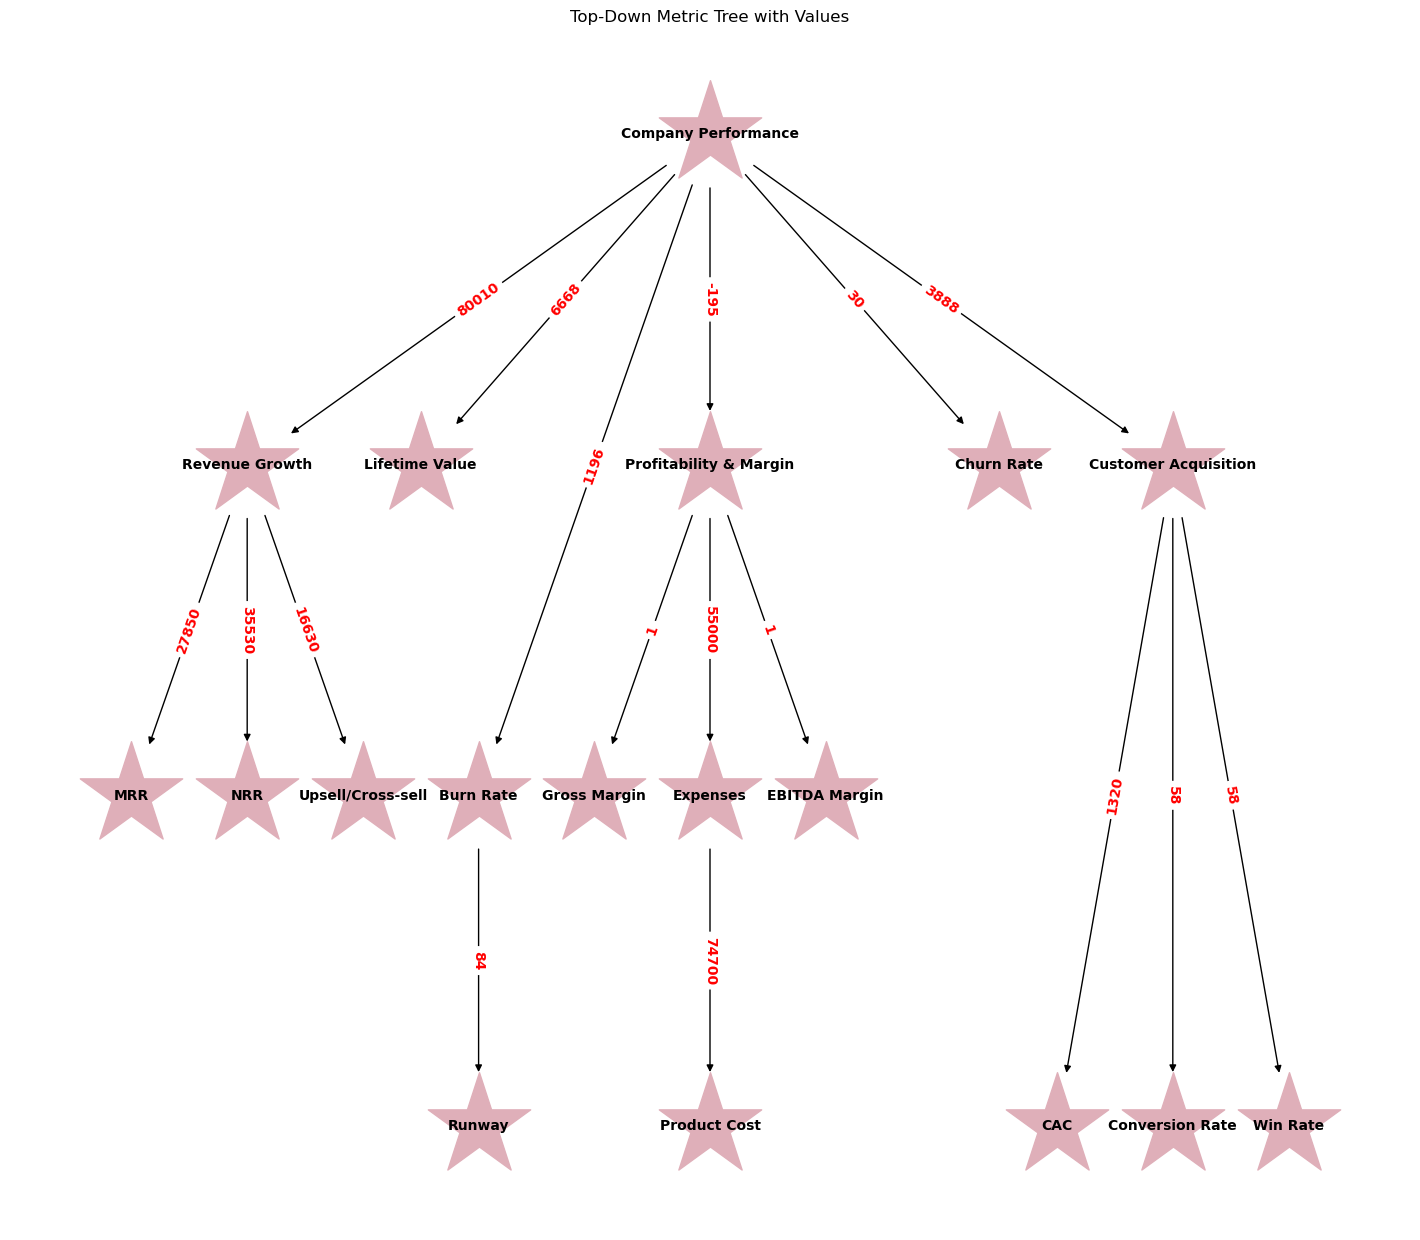

In [15]:

values = {
    'Company Performance': 100,
    'Revenue Growth': MRR + NRR + Upsell_Cross_sell,
    'MRR': MRR,
    'NRR': NRR,
    'Upsell/Cross-sell': Upsell_Cross_sell,
    'Profitability & Margin': Gross_Margin + EBITDA_Margin - round(Expenses / MRR * 100),
    'Gross Margin': Gross_Margin,
    'Expenses': Expenses,
    'Product Cost': Product_Cost,
    'EBITDA Margin': EBITDA_Margin,
    'Customer Acquisition': round(CAC * (1 / Conversion_Rate) * (1 / Win_Rate)) if Conversion_Rate > 0 and Win_Rate > 0 else None,
    'CAC': CAC,
    'Conversion Rate': round(100*Conversion_Rate),
    'Win Rate': round(100*Win_Rate),
    'Burn Rate': round(burn_rate),
    'Runway': round(runway),
    'Lifetime Value': Lifetime_Value,
    'Churn Rate': Churn_Rate,
}

# Define the metric tree
metric_tree = {
    'Company Performance': {
        'Revenue Growth': {
            'MRR': None,
            'NRR': None,
            'Upsell/Cross-sell': None,
        },
        'Profitability & Margin': {
            'Gross Margin': None,
            'Expenses': {
                'Product Cost': None,
            },
            'EBITDA Margin': None,
        },
        'Customer Acquisition': {
            'CAC': None,
            'Conversion Rate': None,
            'Win Rate': None,
        },
        'Burn Rate': {
            'Runway': None,
        },
        'Lifetime Value': None,
        'Churn Rate': None,
    }
}

def add_edges(tree, graph, parent=None):
    for node, children in tree.items():
        if parent:
            graph.add_edge(parent, node, weight=values.get(node, 0))
        if isinstance(children, dict):
            add_edges(children, graph, node)

G = nx.DiGraph()

# Add edges to the graph
add_edges(metric_tree, G)

# Define a manual position for a top-down layout
pos = {
    'Company Performance': (0, 6),
    'Revenue Growth': (-2, 5),
    'Profitability & Margin': (0, 5),
    'Customer Acquisition': (2, 5),
    'MRR': (-2.5, 4),
    'NRR': (-2, 4),
    'Upsell/Cross-sell': (-1.5, 4),
    'Gross Margin': (-0.5, 4),
    'Expenses': (0, 4),
    'EBITDA Margin': (0.5, 4),
    'CAC': (1.5, 3),
    'Conversion Rate': (2, 3),
    'Win Rate': (2.5, 3),
    'Burn Rate': (-1, 4),
    'Runway': (-1, 3),
    'Lifetime Value': (-1.25, 5),
    'Churn Rate': (1.25, 5),
    'Product Cost': (0, 3),
}

plt.figure(figsize=(14, 12))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=6000, node_color='#dfafb9', font_size=10, font_weight='bold', node_shape='*')

# Draw the edge labels with the values
edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_weight='bold', font_size=10)

plt.title('Top-Down Metric Tree with Values')
plt.grid(True)
plt.show()


In [16]:
df.columns

Index(['Date', 'CustomerID', 'CustomerStatus', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionType', 'MonthlySubscriptionFee',
       'TotalPayment', 'MarketingChannel', 'MarketingSpend', 'Opportunities',
       'OpportunitiesClosed', 'ProductCost', 'Renewals', 'UpsellRevenue',
       'CrossSellRevenue', 'ChurnedDate', 'Expenses', 'MRR', 'ARR', 'CR',
       'CAC', 'TotalDuration', 'LTV', 'NRR', 'GrossMargin', 'EBITDA',
       'EBITDA_Margin', 'WinRate'],
      dtype='object')

### References:
[1] https://medium.com/beyond-the-build/21-essential-metrics-for-b2b-and-b2c-products-a-comprehensive-guide-to-measuring-success-99f2618b5a8d  
[2] https://aventis-advisors.com/saas-metrics/  
[3] https://corporatefinanceinstitute.com/resources/valuation/annual-recurring-revenue-arr/?utm_source=google&utm_medium=cpc&utm_term=&utm_content=&utm_campaign=&utm_adgroup=&utm_funnel=&gad_source=1&gbraid=0AAAAAoJkId7en9cirh59KUhKEZhV0Q3HQ&gclid=CjwKCAjwoJa2BhBPEiwA0l0ImN3L1MXKi3avgKFN90x2bdS1mrH8SQTFIcFH9GuRR0bFaQGFcLChShoC3FIQAvD_BwE